# City Analysis

In [22]:
import sqlite3 as lite
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from numpy import median
import numpy as np
from datetime import datetime

In [23]:
conn = lite.connect('../src/db/flatmates_data.db')

In [24]:
query = """SELECT *
FROM flatmates_rent_listings 
"""
df_master = pd.read_sql_query(query,conn)
len(df_master)

30127

In [25]:
df_master.head()

,flatmates_id,url,suburb,city,price,price_includes_bills,rooms_available,house_type,bedroom_count,bathroom_count,people_count,date
0,P156244,/share-house-melbourne-burwood-3125-P156244,Burwood,Melbourne,168,0,1,Share House,4,1,4,1644358725
1,P1013697,/share-house-melbourne-richmond-3121-P1013697,Richmond,Melbourne,215,0,1,Share House,4,1,1,1644358725
2,P1155538,/share-house-melbourne-heidelberg-heights-3081...,Heidelberg Heights,Melbourne,163,0,1,Share House,4,3,4,1644358725
3,P1018684,/share-house-melbourne-hawthorn-3122-P1018684,Hawthorn,Melbourne,207,0,1,Flatshare,2,1,2,1644358725
4,P1040979,/share-house-melbourne-bundoora-3083-P1040979,Bundoora,Melbourne,220,0,1,Share House,3,3,3,1644358725


In [26]:
def clean_flatmates_df(df_input):
    df_input['city'] = df_input.apply(lambda x: x['city'].strip(),axis=1)
    df_input['price'] = df_input['price']/df_input['rooms_available']
    df_input['date'] = df_input.apply(lambda x: datetime.fromtimestamp(int(x['date'])).strftime('%d-%m-%Y')
         if '-' not in str(x['date']) else x['date'],axis=1)
    df_input['date'] = pd.to_datetime(df_input['date'],format='%d-%m-%Y')
    df_input.sort_values(by='date').head()
    df_output = df_input
    return df_output

In [27]:
clean_flatmates_df(df_master).head()

,flatmates_id,url,suburb,city,price,price_includes_bills,rooms_available,house_type,bedroom_count,bathroom_count,people_count,date
0,P156244,/share-house-melbourne-burwood-3125-P156244,Burwood,Melbourne,168.0,0,1,Share House,4,1,4,2022-02-09
1,P1013697,/share-house-melbourne-richmond-3121-P1013697,Richmond,Melbourne,215.0,0,1,Share House,4,1,1,2022-02-09
2,P1155538,/share-house-melbourne-heidelberg-heights-3081...,Heidelberg Heights,Melbourne,163.0,0,1,Share House,4,3,4,2022-02-09
3,P1018684,/share-house-melbourne-hawthorn-3122-P1018684,Hawthorn,Melbourne,207.0,0,1,Flatshare,2,1,2,2022-02-09
4,P1040979,/share-house-melbourne-bundoora-3083-P1040979,Bundoora,Melbourne,220.0,0,1,Share House,3,3,3,2022-02-09


In [28]:
df_master['city'] = df_master.apply(lambda x: x['city'].strip(),axis=1)

In [29]:
cities = ["Sydney", "Melbourne", "Brisbane", "Perth", "Adelaide", "Canberra","Hobart","Darwin"]
df_master = df_master[df_master['city'].isin(cities)]
df_master['city'].unique()

array(['Melbourne', 'Sydney', 'Brisbane', 'Perth', 'Adelaide', 'Canberra',
       'Hobart', 'Darwin'], dtype=object)

In [30]:
df_master['date'] = df_master.apply(lambda x: datetime.fromtimestamp(int(x['date'])).strftime('%d-%m-%Y')
         if '-' not in str(x['date']) else x['date']
         ,axis=1)

In [31]:
df_master['price'] = df_master['price']/df_master['rooms_available']

In [32]:
df_master['date'] = pd.to_datetime(df_master['date'],format='%d-%m-%Y')
df_master.sort_values(by='date').head()

,flatmates_id,url,suburb,city,price,price_includes_bills,rooms_available,house_type,bedroom_count,bathroom_count,people_count,date
0,P156244,/share-house-melbourne-burwood-3125-P156244,Burwood,Melbourne,168.0,0,1,Share House,4,1,4,2022-02-09
78,P896637,/share-house-melbourne-burwood-3125-P896637,Burwood,Melbourne,40.0,1,2,Share House,6,2,6,2022-02-09
77,P1145789,/share-house-melbourne-point-cook-3030-P1145789,Point Cook,Melbourne,210.0,0,1,Share House,4,2,1,2022-02-09
76,P1134350,/share-house-melbourne-berwick-3806-P1134350,Berwick,Melbourne,250.0,0,1,Share House,4,2,3,2022-02-09
75,P1151468,/share-house-melbourne-berwick-3806-P1151468,Berwick,Melbourne,290.0,1,1,Share House,4,2,3,2022-02-09


In [33]:
df_master.where(df_master['date'] >= "2022-05-27").groupby(['date','city']).median().head()

price  rooms_available  bedroom_count  bathroom_count  \
date       city                                                               
2022-05-28 Adelaide   190.0              1.0            3.0             2.0   
           Brisbane   220.0              1.0            3.0             2.0   
           Canberra   250.0              1.0            3.0             2.0   
           Hobart     185.0              1.0            3.0             1.0   
           Melbourne  210.0              1.0            3.0             2.0   

                      people_count  
date       city                     
2022-05-28 Adelaide            3.0  
           Brisbane            2.0  
           Canberra            2.0  
           Hobart              2.5  
           Melbourne           2.0

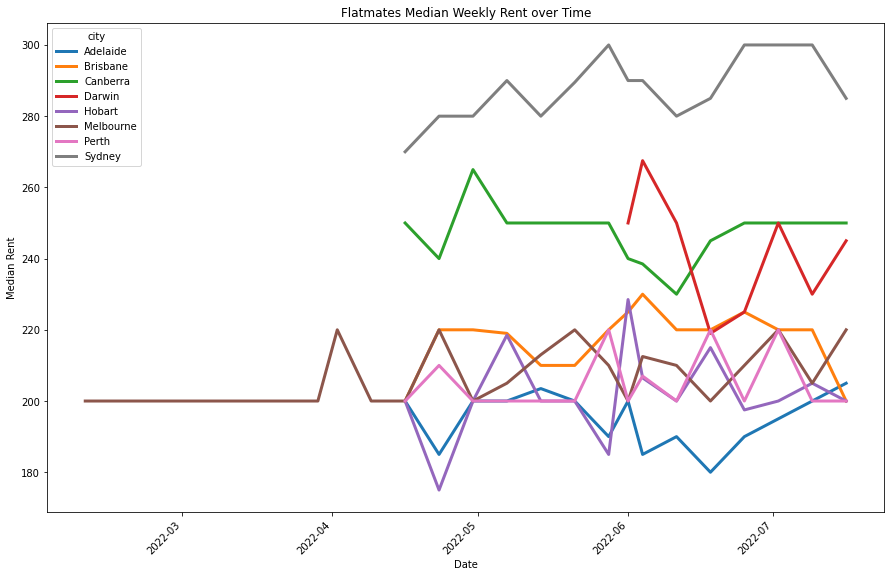

In [34]:
# plt.style.use('fivethirtyeight')
df=df_master
df.groupby(['date','city']) \
    .median()['price'] \
    .unstack() \
    .plot(
    figsize=(15,10),
    linewidth=3)

plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("Median Rent")
plt.title("Flatmates Median Weekly Rent over Time")
plt.show()

In [14]:
df.groupby(['date','city'])['flatmates_id'].count()

date        city     
2022-02-09  Melbourne     108
2022-02-10  Melbourne     337
2022-03-08  Melbourne    2264
2022-03-24  Melbourne     859
2022-03-29  Melbourne     271
                         ... 
2022-07-16  Darwin         14
            Hobart         30
            Melbourne     355
            Perth         122
            Sydney        465
Name: flatmates_id, Length: 120, dtype: int64

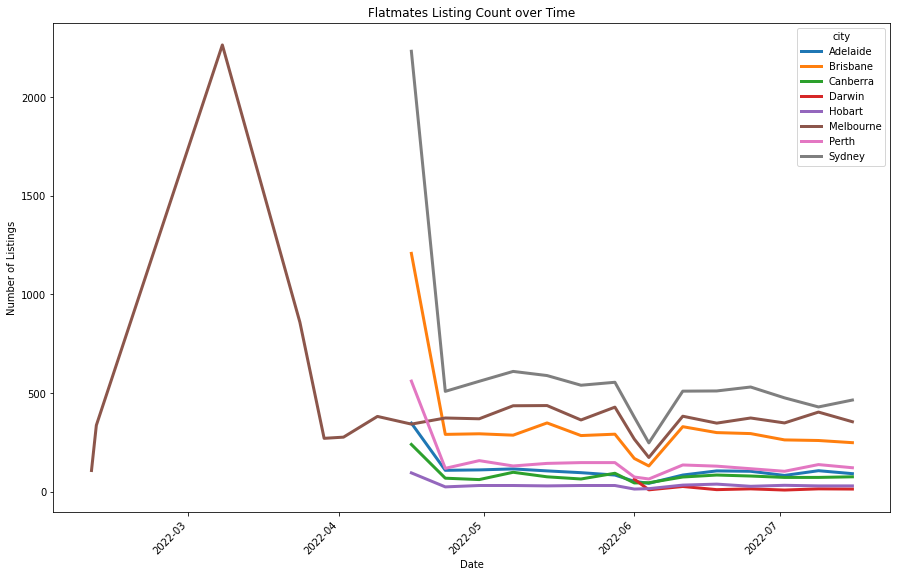

In [15]:
# plt.style.use('fivethirtyeight')

df.groupby(['date','city']) \
    ['flatmates_id'].count() \
    .unstack() \
    .plot(
    figsize=(15,10),
    linewidth=3)

plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("Number of Listings")
plt.title("Flatmates Listing Count over Time")
plt.show()

In [16]:
query = """SELECT *
FROM flatmates_rent_listings 
"""
df_master = pd.read_sql_query(query,conn)
df = clean_flatmates_df(df_master)
df.head()

,flatmates_id,url,suburb,city,price,price_includes_bills,rooms_available,house_type,bedroom_count,bathroom_count,people_count,date
0,P156244,/share-house-melbourne-burwood-3125-P156244,Burwood,Melbourne,168.0,0,1,Share House,4,1,4,2022-02-09
1,P1013697,/share-house-melbourne-richmond-3121-P1013697,Richmond,Melbourne,215.0,0,1,Share House,4,1,1,2022-02-09
2,P1155538,/share-house-melbourne-heidelberg-heights-3081...,Heidelberg Heights,Melbourne,163.0,0,1,Share House,4,3,4,2022-02-09
3,P1018684,/share-house-melbourne-hawthorn-3122-P1018684,Hawthorn,Melbourne,207.0,0,1,Flatshare,2,1,2,2022-02-09
4,P1040979,/share-house-melbourne-bundoora-3083-P1040979,Bundoora,Melbourne,220.0,0,1,Share House,3,3,3,2022-02-09


In [17]:
# grp = df.groupby(['date','suburb'])
# grp['price'].apply(print)
df.where(df['date'] >= "2022-06-17").groupby(['date','suburb']).median().sort_values(['price'],ascending=False)

price  rooms_available  bedroom_count  \
date       suburb                                                  
2022-07-16 Abbotsford     1000.0              1.0            3.0   
2022-06-25 Lavender Bay   1000.0              1.0            1.0   
2022-07-02 Pascoe Vale     850.0              1.0            4.0   
2022-07-16 Tamarama        790.0              1.0            1.0   
           Carlton North   725.0              1.0            3.5   
...                          ...              ...            ...   
2022-06-25 Altona           30.0              1.0            2.0   
2022-07-09 Ivanhoe           0.0              1.0            1.0   
2022-07-02 Glenhaven         0.0              1.0            5.0   
2022-06-18 Forest Lodge      0.0              3.0            3.0   
           Marangaroo        0.0              1.0            4.0   

                          bathroom_count  people_count  
date       suburb                                       
2022-07-16 Abbotsford                1.0           2.0  
2022-06-25 Lavender Bay              1.0           0.0  
2022-07-02 Pascoe Vale               1.0           3.0  
2022-07-16 Tamarama                  1.0           0.0  
           Carlton North             1.5           3.0  
...                                  ...           ...  
2022-06-25 Altona                    2.0           1.0  
2022-07-09 Ivanhoe                   1.0           1.0  
2022-07-02 Glenhaven                 4.0           3.0  
2022-06-18 Forest Lodge              2.0           0.0  
           Marangaroo                2.0           2.0  

[3441 rows x 5 columns]

In [19]:

df_rent_sort.head(20)

NameError: name 'df_rent_sort' is not defined

In [ ]:
df_rent_sort[df_rent_sort['city']=="Melbourne"]

In [ ]:
query = """SELECT suburb, SUM(rooms_available) as rooms_available , SUM(price)/SUM(rooms_available) as average_price
FROM flatmates_rent_listings 
WHERE city like '%""" + city + """%'
GROUP BY suburb 
HAVING SUM(rooms_available)  > 20
ORDER BY average_price DESC 
LIMIT 10"""
df = pd.read_sql_query(query,conn)
df

In [ ]:
query = """SELECT suburb, SUM(rooms_available) as rooms_available , SUM(price)/SUM(rooms_available) as average_price
FROM flatmates_rent_listings 
WHERE city like '%""" + city + """%'
AND NOT house_type = "Student Accommodation"
GROUP BY suburb 
HAVING SUM(rooms_available)  > 20
ORDER BY rooms_available DESC 
LIMIT 10"""
df = pd.read_sql_query(query,conn)
df

In [ ]:
query = """SELECT suburb, SUM(rooms_available) as rooms_available , SUM(price)/SUM(rooms_available) as average_price
FROM flatmates_rent_listings 
WHERE city like '%""" + city + """%'
GROUP BY suburb 
HAVING SUM(rooms_available)  > 5
ORDER BY average_price  
LIMIT 10
"""
df = pd.read_sql_query(query,conn)
df